In [232]:
# предварительно в консоли прописал brew install gdal
# pip install geopandas rasterio geopy 

import glob
import zipfile
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rasterio
import geopandas as gpd
from rasterio.mask import mask
from rasterio.plot import show 
from geopy.distance import geodesic
from shapely.geometry import Polygon

In [175]:
from FFP_Python import calc_footprint_FFP as fp
from FFP_Python import calc_footprint_FFP_climatology as fpc


/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ilyadrozd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

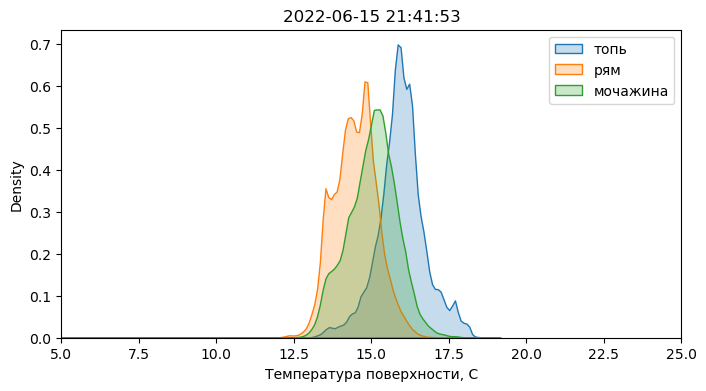

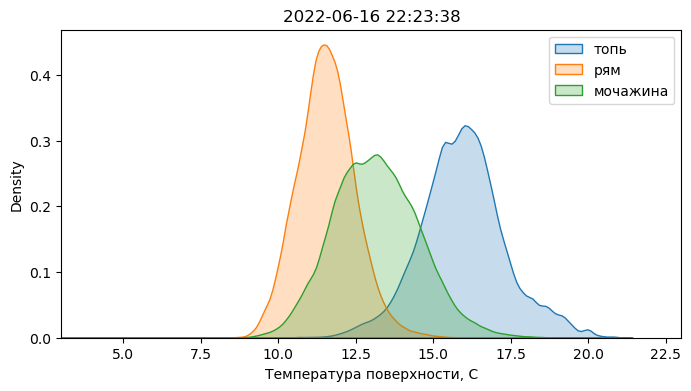

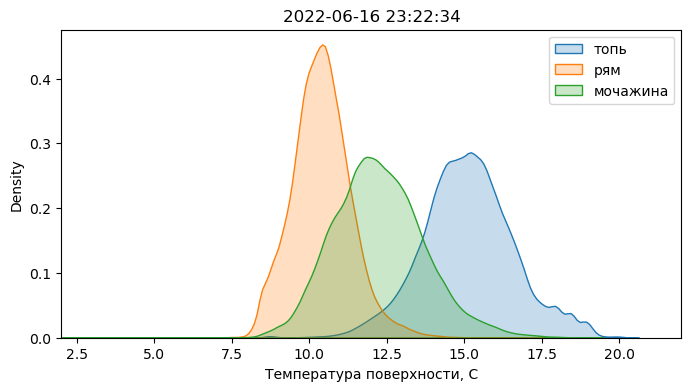

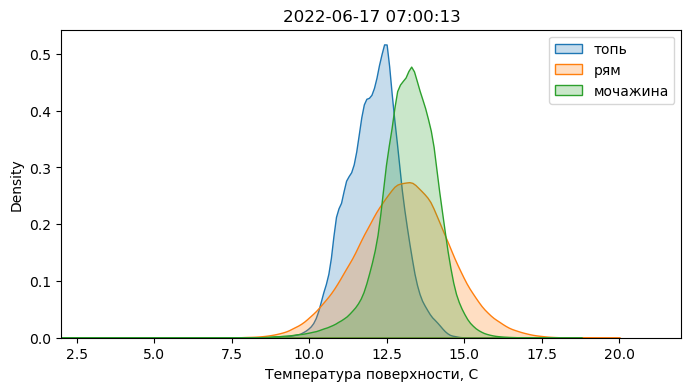

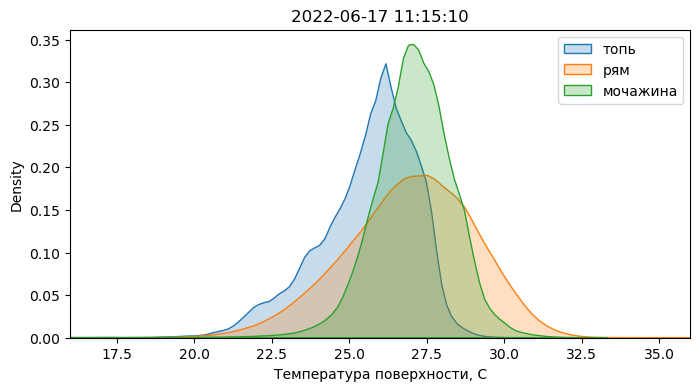

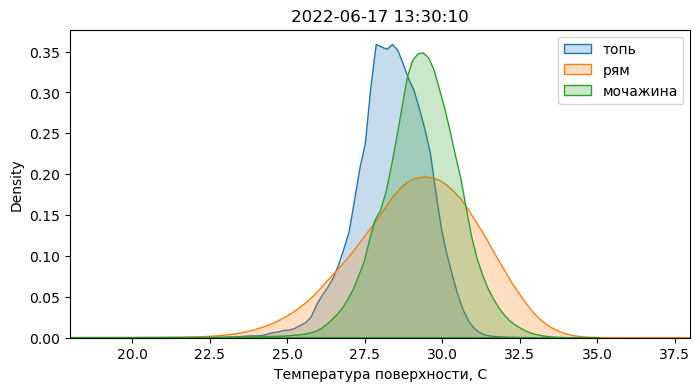

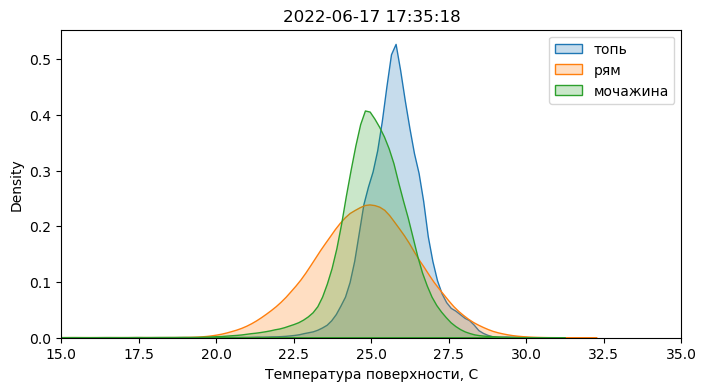

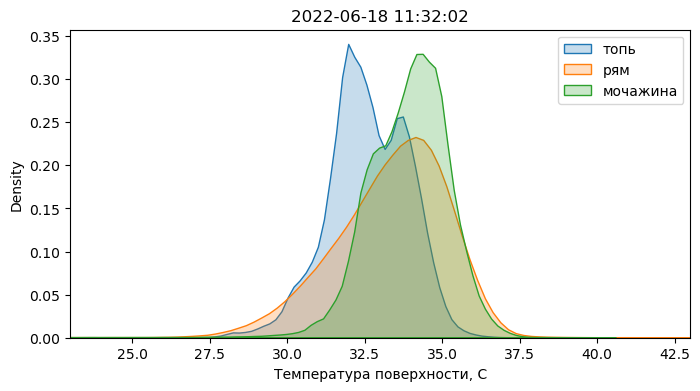

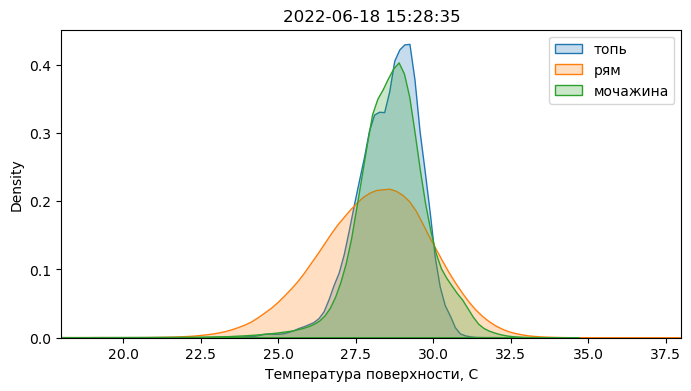

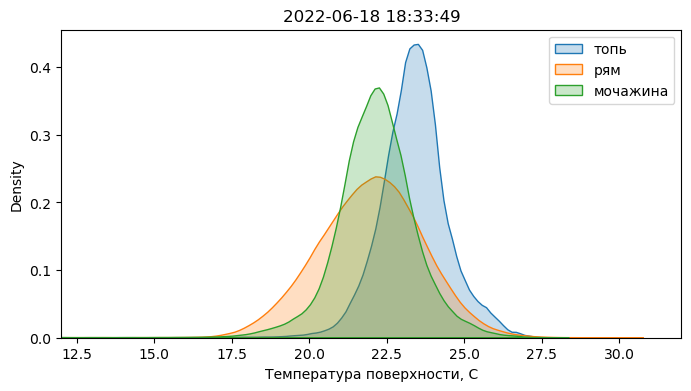

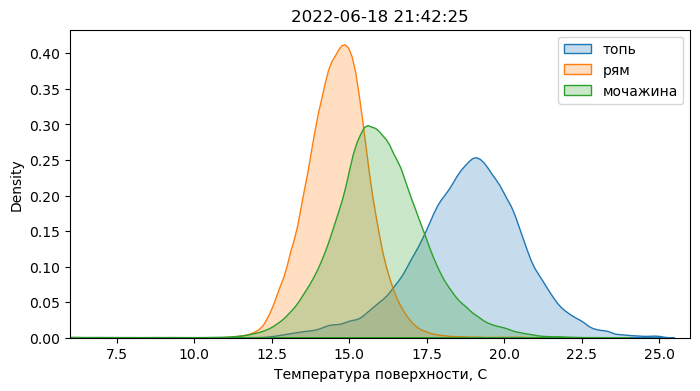

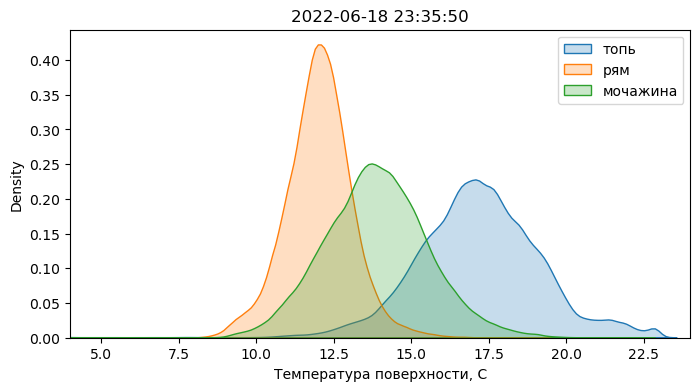

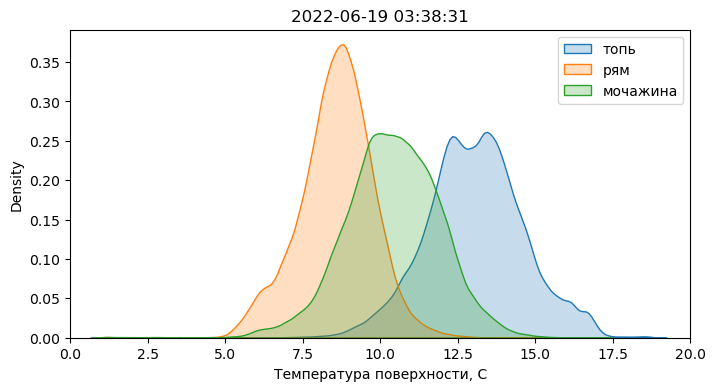

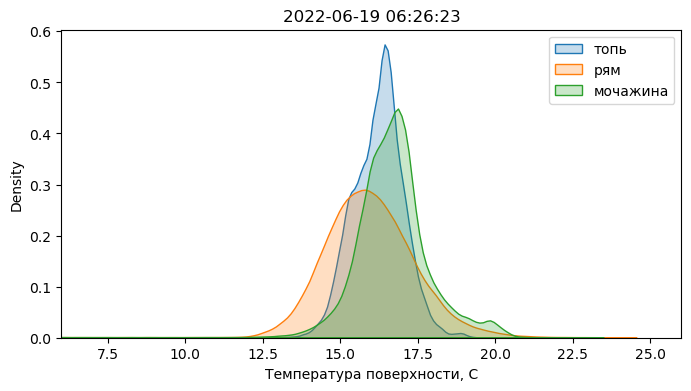

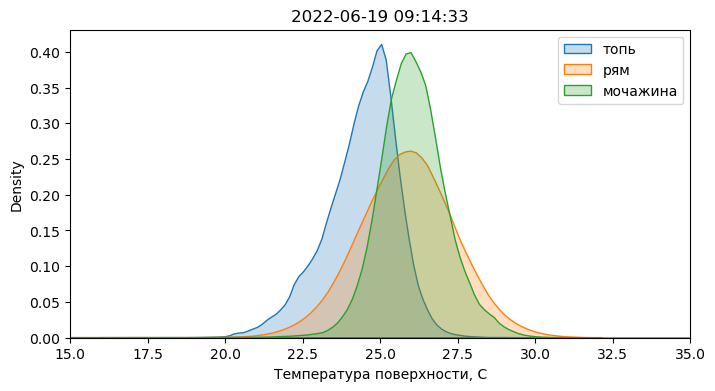

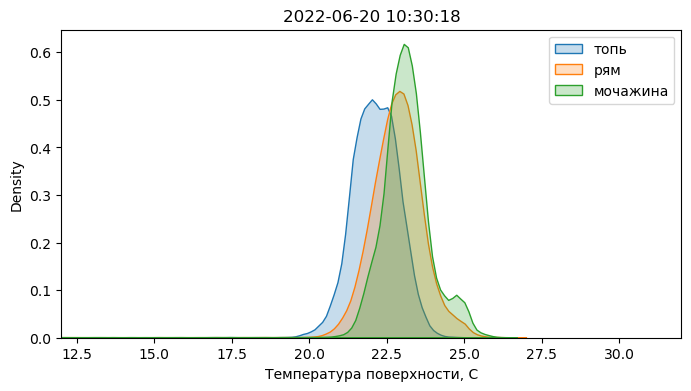

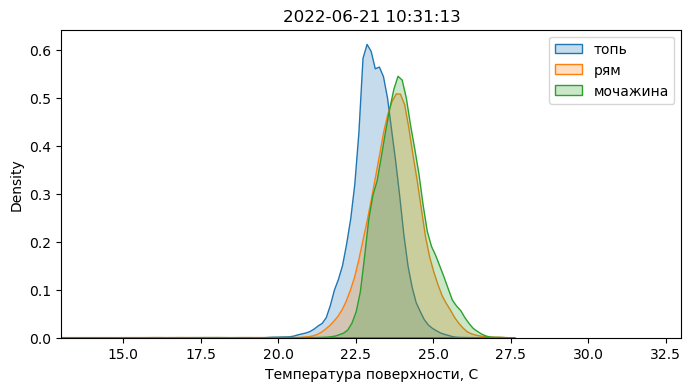

In [195]:
vector_path = '/Users/ilyadrozd/IAP/Muhkrino/layersV.geojson'
mask_names = ['топь', 'рям', 'мочажина']
mask_indices = [2,0,1]


date_length = 15
date_format = '%Y%m%d_%H%M%S'

# Поиск всех файлов, соответствующих шаблону
file_pattern = '/Users/ilyadrozd/IAP/Muhkrino/IR TIFS/corrected/*.tif'
file_list = glob.glob(file_pattern)
file_list = sorted(file_list)


for raster_path in file_list:

    date_index = raster_path.rfind('/')+1
    date_string = raster_path[date_index:date_index+date_length]
    title = datetime.strptime(date_string, date_format)

    hist_create(raster_path, vector_path, mask_indices, mask_names, title)

In [194]:

def hist_create(raster_path, vector_path, mask_indices, mask_names, title):

    # Read raster image
    raster = rasterio.open(raster_path)

    # Read vector mask
    vector = gpd.read_file(vector_path)

    plt.figure(figsize=(8, 4))
    
    mean = 0
    for i, name in zip(mask_indices, mask_names):
        # Convert the MultiPolygon to the GeoJSON format
        geojson = vector.geometry[i].__geo_interface__

        # Perform the crop operation
        cropped_image, cropped_transform = mask(dataset=raster, shapes=[geojson], crop=True)

#         cropped_meta = raster.meta.copy()
#         cropped_meta.update({
#             'height': cropped_image.shape[1],
#             'width': cropped_image.shape[2],
#             'transform': cropped_transform
#         })

        cropped_image[0][cropped_image[1] == 0] = np.nan

    #     plt.figure(figsize=(20, 15))

    #     plt.imshow(cropped_image[0])

        sns.kdeplot(cropped_image[0].flatten(), fill=True, label=name)
        
        mean += np.nanmean(cropped_image[0])
    
    mean //= len(mask_indices)
    plt.xlim([mean-10,mean+10])
    plt.legend()
    plt.xlabel('Температура поверхности, С')
    plt.title(title)
    plt.savefig(raster_path[:-4]+'_hist.png', dpi=100)

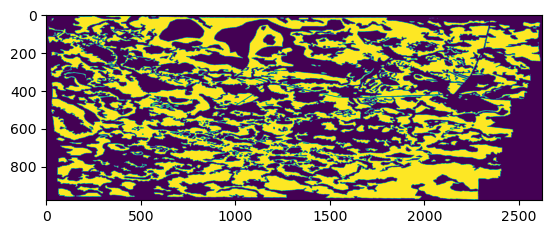

In [141]:
plt.imshow(cropped_image[1])

In [4]:
# Поиск всех файлов, соответствующих шаблону
# file_pattern = '/Users/ilyadrozd/IAP/Muhkrino/EC/ryam/*.zip'
# file_list = glob.glob(file_pattern)
# file_list = sorted(file_list)
# for file_name in file_list:
#     with zipfile.ZipFile(file_name, 'r') as myzip:
#         # Извлекаем все файлы из архива в текущую директорию
#         myzip.extractall(file_name[:-4])

In [244]:
def new_point(lat, lon, delta_lat, delta_lon, xy=False):
    # (lat, lon) - Координаты точки (широта, долгота) в градусах
    # (delta_lat, delta_lon) - Cмещение точки по (широте, долготе) в метрах

    # Рассчитываем координаты точки смещения по широте
    new_lat = lat + (delta_lat / geodesic((lat, lon), (lat + 1, lon)).meters)

    # Рассчитываем координаты точки смещения по долготе
    new_lon = lon + (delta_lon / geodesic((lat, lon), (lat, lon + 1)).meters)
    
    if xy:
        return (new_lon, new_lat)
    else:
        return (new_lat, new_lon)
    
    
def create_df(file_pattern, drop=-1, header=0):
    
    file_list = glob.glob(file_pattern)
    file_list = sorted(file_list)

    combined_df = pd.DataFrame()
    for file_name in file_list:
        df = pd.read_csv(file_name, sep=',', header=header)
        if drop >= 0: df.drop(drop, inplace=True)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df


def calculate_coriolis_parameter(latitude):
    omega = 7.2921e-5 # угловая скорость вращения Земли  рад/сек
    f = 2 * omega * np.sin(np.radians(latitude))
    return f


def select_variables(df):
    
    datetime = pd.to_datetime(df['date'] + ' ' + df['time'])

    df = df[['wind_speed', 'wind_dir','(z-d)/L', 
         'L', 'u*', 'u_var', 'v_var']].astype(float)

    df.index = datetime

    df['z-d'] = df['(z-d)/L'] * df['L']

    f = calculate_coriolis_parameter(60.89142435)
    df['h'] = (-1 + (1 + 2.28 * df['u*'] / (df['L'] * f)) ** (1/2)) * df['L'] / 3.8
    df.loc[df['(z-d)/L']<0,'h'] = 1000
    df['sigmav'] = (df['u_var']+df['v_var'])**(1/2)
    
    df.dropna(inplace=True)
    return df

In [136]:
# если нужно открыть файлы с данными в другом формате (сами данные одинаковые)
# file_pattern = '/Users/ilyadrozd/IAP/Muhkrino/EC/gryada/*/output/eddypro_exp_fluxnet_*_exp.csv'
# fluxnet = create_df(file_pattern)
# print(*fluxnet.columns, sep='\n')


In [262]:
# name = 'gryada'
# tower_lat = 60.89142435
# tower_lon = 68.67640836

# name = 'ryam'
# tower_lat = 60.89606888
# tower_lon = 68.68314311

name = 'mocha'
tower_lat = 60.89318384
tower_lon = 68.68313201

file_pattern = f'/Users/ilyadrozd/IAP/Muhkrino/EC/{name}/*/output/eddypro_exp_full_output_*_exp.csv'


EC = create_df(file_pattern, header=1, drop=0)
# print(*EC.columns, sep='\n')

EC = select_variables(EC)
EC

wind_speed  wind_dir   (z-d)/L         L        u*  \
2022-06-13 12:00:00     2.09647  334.8770 -0.107698   622.111  0.273694   
2022-06-13 17:30:00     2.05259  341.5900 -0.017386  3853.660  0.314339   
2022-06-13 18:00:00     1.76343  345.7680 -0.041133  1628.870  0.311869   
2022-06-13 18:30:00     2.03185  341.7200 -0.087324   767.261  0.279852   
2022-06-13 19:00:00     2.15820  335.2120 -0.231899   288.919  0.287020   
...                         ...       ...       ...       ...       ...   
2022-06-21 23:00:00     3.02508   62.9659 -0.004691   428.485  0.357901   
2022-06-21 23:30:00     2.93162   64.0486 -0.005114   393.053  0.327228   
2022-06-22 00:00:00     2.65518   61.8718 -0.003040   661.202  0.293461   
2022-06-22 00:30:00     2.20165   70.5361 -0.005931   338.878  0.235085   
2022-06-22 01:00:00     2.39992   72.3356 -0.004109   489.210  0.254291   

                        u_var     v_var        z-d       h    sigmav  
2022-06-13 12:00:00  0.500698  0.387794 -67.000110  1000.0  0.942599  
2022-06-13 17:30:00  0.594533  0.390516 -67.000118  1000.0  0.992496  
2022-06-13 18:00:00  0.517775  0.371380 -66.999984  1000.0  0.942950  
2022-06-13 18:30:00  0.562165  0.390688 -66.999993  1000.0  0.976142  
2022-06-13 19:00:00  0.557039  0.346765 -67.000027  1000.0  0.950686  
...                       ...       ...        ...     ...       ...  
2022-06-21 23:00:00  0.849280  0.604648  -2.009997  1000.0  1.205789  
2022-06-21 23:30:00  0.718306  0.534548  -2.009998  1000.0  1.119310  
2022-06-22 00:00:00  0.547519  0.628266  -2.010001  1000.0  1.084336  
2022-06-22 00:30:00  0.397771  0.297584  -2.009997  1000.0  0.833879  
2022-06-22 01:00:00  0.463910  0.423662  -2.010002  1000.0  0.942110  

[142 rows x 10 columns]


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  142
Calculating footprint  8  of  142

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is inval

Calculating footprint  85  of  142
Calculating footprint  92  of  142

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  99  of  142

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 E

/var/folders/9b/mz6gplyd4gb2ks60mcv4xhw00000gn/T/ipykernel_92238/1914155821.py:75: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  segs = cs.allsegs[0]


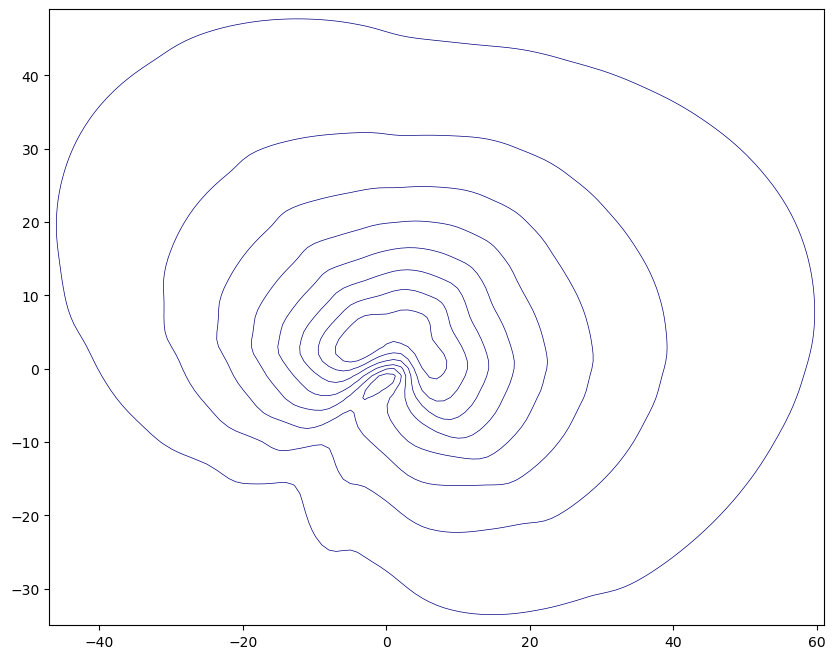

In [259]:
EC['z-d'] = 2 

footprint = FFP_climatology(zm=list(EC['z-d']), 
                            z0=None, 
                            umean=list(EC['wind_speed']),
                            wind_dir=list(EC['wind_dir']), 
                            h=list(EC['h']), 
                            ol=list(EC['L']), 
                            sigmav=list(EC['sigmav']),
                            ustar=list(EC['u*']), 
                            dx=1, 
                            domain=[-500,500,-500,500], 
                            crop=1, 
                            fig=1,
                            show_heatmap=False)

In [260]:
footprint['n']

92

In [263]:
# Создание координат полигона
coordinates = [new_point(tower_lat, tower_lon, y, x, xy=True) for y, x in zip(footprint['yr'][7], footprint['xr'][7])]


# Создание полигона с использованием координат
polygon = Polygon(coordinates)

# Создание геопандас GeoDataFrame с полигоном
gdf = gpd.GeoDataFrame(geometry=[polygon])

# Установка системы координат (EPSG:4326 - WGS 84)
gdf.crs = "EPSG:4326"

# Сохранение GeoDataFrame в файле .shp
file_path = f"./footprints/{name}/footprint_{name}.shp"
gdf.to_file(file_path)

In [38]:
def check_ffp_inputs(ustar, sigmav, h, ol, wind_dir, zm, z0, umean, rslayer, verbosity):
    # Check passed values for physical plausibility and consistency
    if zm <= 0.:
        raise_ffp_exception(2, verbosity)
        return False
    if z0 is not None and umean is None and z0 <= 0.:
        raise_ffp_exception(3, verbosity)
        return False
    if h <= 10.:
        raise_ffp_exception(4, verbosity)
        return False
    if zm > h :
        raise_ffp_exception(5, verbosity)
        return False
    if z0 is not None and umean is None and zm <= 12.5*z0:
        if rslayer == 1:
            raise_ffp_exception(6, verbosity)
        else:
            raise_ffp_exception(20, verbosity)
            return False
    if float(zm)/ol <= -15.5:
        raise_ffp_exception(7, verbosity)
        return False
    if sigmav <= 0:
        raise_ffp_exception(8, verbosity)
        return False
    if ustar <= 0.1:
        raise_ffp_exception(9, verbosity)
        return False
    if wind_dir > 360:
        raise_ffp_exception(10, verbosity)
        return False
    if wind_dir < 0:
        raise_ffp_exception(10, verbosity)
        return False
    return True

#===============================================================================
#===============================================================================
def get_contour_levels(f, dx, dy, rs=None):
    '''Contour levels of f at percentages of f-integral given by rs'''

    import numpy as np
    from numpy import ma
    import sys

    #Check input and resolve to default levels in needed
    if not isinstance(rs, (int, float, list)):
        rs = list(np.linspace(0.10, 0.90, 9))
    if isinstance(rs, (int, float)): rs = [rs]

    #Levels
    pclevs = np.empty(len(rs))
    pclevs[:] = np.nan
    ars = np.empty(len(rs))
    ars[:] = np.nan

    sf = np.sort(f, axis=None)[::-1]
    msf = ma.masked_array(sf, mask=(np.isnan(sf) | np.isinf(sf))) #Masked array for handling potential nan
    csf = msf.cumsum().filled(np.nan)*dx*dy
    for ix, r in enumerate(rs):
        dcsf = np.abs(csf - r)
        pclevs[ix] = sf[np.nanargmin(dcsf)]
        ars[ix] = csf[np.nanargmin(dcsf)]

    return [(round(r, 3), ar, pclev) for r, ar, pclev in zip(rs, ars, pclevs)]

#===============================================================================
def get_contour_vertices(x, y, f, lev):
    # import matplotlib._contour as cntr
    import matplotlib.pyplot as plt

    cs = plt.contour(x,y, f, [lev])
    plt.close()
    segs = cs.allsegs[0]
    xr = [vert[0] for vert in segs]
    yr = [vert[1] for vert in segs]
    #Set contour to None if it's found to reach the physical domain
    if x.min() >= min(segs[:, 0]) or max(segs[:, 0]) >= x.max() or \
       y.min() >= min(segs[:, 1]) or max(segs[:, 1]) >= y.max():
        return [None, None]

    return [xr, yr]   # x,y coords of contour points.	

#===============================================================================
def plot_footprint(x_2d, y_2d, fs, clevs=None, show_heatmap=True, normalize=None, 
                   colormap=None, line_width=0.5, iso_labels=None):
    '''Plot footprint function and contours if request'''

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    from matplotlib.colors import LogNorm

    #If input is a list of footprints, don't show footprint but only contours,
    #with different colors
    if isinstance(fs, list):
        show_heatmap = False
    else:
        fs = [fs]

    if colormap is None: colormap = cm.jet
    #Define colors for each contour set
    cs = [colormap(ix) for ix in np.linspace(0, 1, len(fs))]

    # Initialize figure
    fig, ax = plt.subplots(figsize=(10, 8))
    # fig.patch.set_facecolor('none')
    # ax.patch.set_facecolor('none')

    if clevs is not None:
        #Temporary patch for pyplot.contour requiring contours to be in ascending orders
        clevs = clevs[::-1]

        #Eliminate contour levels that were set to None
        #(e.g. because they extend beyond the defined domain)
        clevs = [clev for clev in clevs if clev is not None]

        #Plot contour levels of all passed footprints
        #Plot isopleth
        levs = [clev for clev in clevs]
        for f, c in zip(fs, cs):
            cc = [c]*len(levs)
            if show_heatmap:
                cp = ax.contour(x_2d, y_2d, f, levs, colors = 'w', linewidths=line_width)
            else:
                cp = ax.contour(x_2d, y_2d, f, levs, colors = cc, linewidths=line_width)
            #Isopleth Labels
            if iso_labels is not None:
                pers = [str(int(clev[0]*100))+'%' for clev in clevs]
                fmt = {}
                for l,s in zip(cp.levels, pers):
                    fmt[l] = s
                plt.clabel(cp, cp.levels[:], inline=1, fmt=fmt, fontsize=7)

    #plot footprint heatmap if requested and if only one footprint is passed
    if show_heatmap:
        if normalize == 'log':
            norm = LogNorm()
        else:
            norm = None

        xmin = np.nanmin(x_2d)
        xmax = np.nanmax(x_2d)
        ymin = np.nanmin(y_2d)
        ymax = np.nanmax(y_2d)
        for f in fs:
            im = ax.imshow(f[:, :], cmap=colormap, extent=(xmin, xmax, ymin, ymax),
                 norm=norm, origin='lower', aspect=1)
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')

        #Colorbar
        cbar = fig.colorbar(im, shrink=1.0, format='%.3e')
        #cbar.set_label('Flux contribution', color = 'k')
    plt.show()

    return fig, ax

#===============================================================================
#===============================================================================
exTypes = {'message': 'Message',
           'alert': 'Alert',
           'error': 'Error',
           'fatal': 'Fatal error'}

exceptions = [
    {'code': 1,
     'type': exTypes['fatal'],
     'msg': 'At least one required parameter is missing. Please enter all '
            'required inputs. Check documentation for details.'},
    {'code': 2,
     'type': exTypes['error'],
     'msg': 'zm (measurement height) must be larger than zero.'},
    {'code': 3,
     'type': exTypes['error'],
     'msg': 'z0 (roughness length) must be larger than zero.'},
    {'code': 4,
     'type': exTypes['error'],
     'msg': 'h (BPL height) must be larger than 10 m.'},
    {'code': 5,
     'type': exTypes['error'],
     'msg': 'zm (measurement height) must be smaller than h (PBL height).'},
    {'code': 6,
     'type': exTypes['alert'],
     'msg': 'zm (measurement height) should be above roughness sub-layer (12.5*z0).'},
    {'code': 7,
     'type': exTypes['error'],
     'msg': 'zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.'},
    {'code': 8,
     'type': exTypes['error'],
     'msg': 'sigmav (standard deviation of crosswind) must be larger than zero.'},
    {'code': 9,
     'type': exTypes['error'],
     'msg': 'ustar (friction velocity) must be >=0.1.'},
    {'code': 10,
     'type': exTypes['error'],
     'msg': 'wind_dir (wind direction) must be >=0 and <=360.'},
    {'code': 11,
     'type': exTypes['fatal'],
     'msg': 'Passed data arrays (ustar, zm, h, ol) don\'t all have the same length.'},
    {'code': 12,
     'type': exTypes['fatal'],
     'msg': 'No valid zm (measurement height above displacement height) passed.'},
    {'code': 13,
     'type': exTypes['alert'],
     'msg': 'Using z0, ignoring umean if passed.'},
    {'code': 14,
     'type': exTypes['alert'],
     'msg': 'No valid z0 passed, using umean.'},
    {'code': 15,
     'type': exTypes['fatal'],
     'msg': 'No valid z0 or umean array passed.'},
    {'code': 16,
     'type': exTypes['error'],
     'msg': 'At least one required input is invalid. Skipping current footprint.'},
    {'code': 17,
     'type': exTypes['alert'],
     'msg': 'Only one value of zm passed. Using it for all footprints.'},
    {'code': 18,
     'type': exTypes['fatal'],
     'msg': 'if provided, rs must be in the form of a number or a list of numbers.'},
    {'code': 19,
     'type': exTypes['alert'],
     'msg': 'rs value(s) larger than 90% were found and eliminated.'},
    {'code': 20,
     'type': exTypes['error'],
     'msg': 'zm (measurement height) must be above roughness sub-layer (12.5*z0).'},
    ]

def raise_ffp_exception(code, verbosity):
    '''Raise exception or prints message according to specified code'''

    ex = [it for it in exceptions if it['code'] == code][0]
    string = ex['type'] + '(' + str(ex['code']).zfill(4) + '):\n '+ ex['msg']

    if verbosity > 0: print('')

    if ex['type'] == exTypes['fatal']:
        if verbosity > 0:
            string = string + '\n FFP_fixed_domain execution aborted.'
        else:
            string = ''
        raise Exception(string)
    elif ex['type'] == exTypes['alert']:
        string = string + '\n Execution continues.'
        if verbosity > 1: print (string)
    elif ex['type'] == exTypes['error']:
        string = string + '\n Execution continues.'
        if verbosity > 1: print (string)
    else:
        if verbosity > 1: print (string)


In [254]:
import numpy as np
import sys
import numbers
import matplotlib
from scipy import signal as sg

def FFP_climatology(zm=None, z0=None, umean=None, h=None, ol=None, sigmav=None, ustar=None,
                    wind_dir=None, domain=None, dx=None, dy=None, nx=None, ny=None, 
                    rs=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], rslayer=0,
                    smooth_data=1, crop=False, pulse=None, verbosity=2, fig=False, **kwargs):

    #===========================================================================
    # Get kwargs
    show_heatmap = kwargs.get('show_heatmap', True)

    #===========================================================================
    # Input check
    flag_err = 0

    # Convert all input items to lists
    if not isinstance(zm, list): zm = [zm]
    if not isinstance(h, list): h = [h]
    if not isinstance(ol, list): ol = [ol]
    if not isinstance(sigmav, list): sigmav = [sigmav]
    if not isinstance(ustar, list): ustar = [ustar]
    if not isinstance(wind_dir, list): wind_dir = [wind_dir]
    if not isinstance(z0, list): z0 = [z0]
    if not isinstance(umean, list): umean = [umean]

    # Check existence of required input pars
    if None in [zm, h, ol, sigmav, ustar] or (z0 is None and umean is None):
        raise_ffp_exception(1, verbosity)

    # Check that all lists have same length, if not raise an error and exit
    ts_len = len(ustar)
    if any(len(lst) != ts_len for lst in [sigmav, wind_dir, h, ol]):
        # at least one list has a different length, exit with error message
        raise_ffp_exception(11, verbosity)

    # Special treatment for zm, which is allowed to have length 1 for any
    # length >= 1 of all other parameters
    if all(val is None for val in zm): raise_ffp_exception(12, verbosity)
    if len(zm) == 1:
        raise_ffp_exception(17, verbosity)
        zm = [zm[0] for i in range(ts_len)]

    # Resolve ambiguity if both z0 and umean are passed (defaults to using z0)
    # If at least one value of z0 is passed, use z0 (by setting umean to None)
    if not all(val is None for val in z0):
        raise_ffp_exception(13, verbosity)
        umean = [None for i in range(ts_len)]
        # If only one value of z0 was passed, use that value for all footprints
        if len(z0) == 1: z0 = [z0[0] for i in range(ts_len)]
    elif len(umean) == ts_len and not all(val is None for val in umean):
        raise_ffp_exception(14, verbosity)
        z0 = [None for i in range(ts_len)]
    else:
        raise_ffp_exception(15, verbosity)

    # Rename lists as now the function expects time series of inputs
    ustars, sigmavs, hs, ols, wind_dirs, zms, z0s, umeans = \
            ustar, sigmav, h, ol, wind_dir, zm, z0, umean

    #===========================================================================
    # Handle rs
    if rs is not None:

        # Check that rs is a list, otherwise make it a list
        if isinstance(rs, numbers.Number): 
            if 0.9 < rs <= 1 or 90 < rs <= 100: rs = 0.9
            rs = [rs]
        if not isinstance(rs, list): raise_ffp_exception(18, verbosity)

        # If rs is passed as percentages, normalize to fractions of one
        if np.max(rs) >= 1: rs = [x/100. for x in rs]

        # Eliminate any values beyond 0.9 (90%) and inform user
        if np.max(rs) > 0.9:
            raise_ffp_exception(19, verbosity)
            rs = [item for item in rs if item <= 0.9]

        # Sort levels in ascending order
        rs = list(np.sort(rs))

    #===========================================================================
    # Define computational domain
    # Check passed values and make some smart assumptions
    if isinstance(dx, numbers.Number) and dy is None: dy = dx
    if isinstance(dy, numbers.Number) and dx is None: dx = dy
    if not all(isinstance(item, numbers.Number) for item in [dx, dy]): dx = dy = None
    if isinstance(nx, int) and ny is None: ny = nx
    if isinstance(ny, int) and nx is None: nx = ny
    if not all(isinstance(item, int) for item in [nx, ny]): nx = ny = None
    if not isinstance(domain, list) or len(domain) != 4: domain = None

    if all(item is None for item in [dx, nx, domain]):
        # If nothing is passed, default domain is a square of 2 Km size centered
        # at the tower with pizel size of 2 meters (hence a 1000x1000 grid)
        domain = [-1000., 1000., -1000., 1000.]
        dx = dy = 2.
        nx = ny = 1000
    elif domain is not None:
        # If domain is passed, it takes the precendence over anything else
        if dx is not None:
            # If dx/dy is passed, takes precendence over nx/ny
            nx = int((domain[1]-domain[0]) / dx)
            ny = int((domain[3]-domain[2]) / dy)
        else:
            # If dx/dy is not passed, use nx/ny (set to 1000 if not passed)
            if nx is None: nx = ny = 1000
            # If dx/dy is not passed, use nx/ny
            dx = (domain[1]-domain[0]) / float(nx)
            dy = (domain[3]-domain[2]) / float(ny)
    elif dx is not None and nx is not None:
        # If domain is not passed but dx/dy and nx/ny are, define domain
        domain = [-nx*dx/2, nx*dx/2, -ny*dy/2, ny*dy/2]
    elif dx is not None:
        # If domain is not passed but dx/dy is, define domain and nx/ny
        domain = [-1000, 1000, -1000, 1000]
        nx = int((domain[1]-domain[0]) / dx)
        ny = int((domain[3]-domain[2]) / dy)
    elif nx is not None:
        # If domain and dx/dy are not passed but nx/ny is, define domain and dx/dy
        domain = [-1000, 1000, -1000, 1000]
        dx = (domain[1]-domain[0]) / float(nx)
        dy = (domain[3]-domain[2]) / float(nx)

    # Put domain into more convenient vars
    xmin, xmax, ymin, ymax = domain

    # Define rslayer if not passed
    if rslayer == None: rslayer == 0

    # Define smooth_data if not passed
    if smooth_data == None: smooth_data == 1

    # Define crop if not passed
    if crop == None: crop == 0

    # Define pulse if not passed
    if pulse == None:
        if ts_len <= 20:
            pulse = 1
        else:
            pulse = int(ts_len / 20)

    # Define fig if not passed
    if fig == None: fig == 0

    #===========================================================================
    # Model parameters
    a = 1.4524
    b = -1.9914
    c = 1.4622
    d = 0.1359
    ac = 2.17
    bc = 1.66
    cc = 20.0

    oln = 5000 #limit to L for neutral scaling
    k = 0.4 #von Karman

    #===========================================================================
    # Define physical domain in cartesian and polar coordinates
    # Cartesian coordinates
    x = np.linspace(xmin, xmax, nx + 1)
    y = np.linspace(ymin, ymax, ny + 1)
    x_2d, y_2d = np.meshgrid(x, y)

    # Polar coordinates
    # Set theta such that North is pointing upwards and angles increase clockwise
    rho = np.sqrt(x_2d**2 + y_2d**2)
    theta = np.arctan2(x_2d, y_2d)

    # initialize raster for footprint climatology
    fclim_2d = np.zeros(x_2d.shape)

    #===========================================================================
    # Loop on time series

    # Initialize logic array valids to those 'timestamps' for which all inputs are
    # at least present (but not necessarily phisically plausible)
    valids = [True if not any([val is None for val in vals]) else False \
              for vals in zip(ustars, sigmavs, hs, ols, wind_dirs, zms)]

    if verbosity > 1: print ('')
    for ix, (ustar, sigmav, h, ol, wind_dir, zm, z0, umean) \
            in enumerate(zip(ustars, sigmavs, hs, ols, wind_dirs, zms, z0s, umeans)):

        # Counter
        if verbosity > 1 and ix % pulse == 0:
            print ('Calculating footprint ', ix+1, ' of ', ts_len)

        valids[ix] = check_ffp_inputs(ustar, sigmav, h, ol, wind_dir, zm, z0, umean, rslayer, verbosity)

        # If inputs are not valid, skip current footprint
        if not valids[ix]:
            raise_ffp_exception(16, verbosity)
        else:
            #===========================================================================
            # Rotate coordinates into wind direction
            if wind_dir is not None:
                rotated_theta = theta - wind_dir * np.pi / 180.

            #===========================================================================
            # Create real scale crosswind integrated footprint and dummy for
            # rotated scaled footprint
            fstar_ci_dummy = np.zeros(x_2d.shape)
            f_ci_dummy = np.zeros(x_2d.shape)
            xstar_ci_dummy = np.zeros(x_2d.shape)
            px = np.ones(x_2d.shape)
            if z0 is not None:
                # Use z0
                if ol <= 0 or ol >= oln:
                    xx = (1 - 19.0 * zm/ol)**0.25
                    psi_f = (np.log((1 + xx**2) / 2.) + 2. * np.log((1 + xx) / 2.) - 2. * np.arctan(xx) + np.pi/2)
                elif ol > 0 and ol < oln:
                    psi_f = -5.3 * zm / ol
                if (np.log(zm / z0)-psi_f)>0:
                    xstar_ci_dummy = (rho * np.cos(rotated_theta) / zm * (1. - (zm / h)) / (np.log(zm / z0) - psi_f))
                    px = np.where(xstar_ci_dummy > d)
                    fstar_ci_dummy[px] = a * (xstar_ci_dummy[px] - d)**b * np.exp(-c / (xstar_ci_dummy[px] - d))
                    f_ci_dummy[px] = (fstar_ci_dummy[px] / zm * (1. - (zm / h)) / (np.log(zm / z0) - psi_f))
                else:
                    flag_err = 3
                    valids[ix] = 0
            else:
                # Use umean if z0 not available
                xstar_ci_dummy = (rho * np.cos(rotated_theta) / zm * (1. - (zm / h)) / (umean / ustar * k))
                px = np.where(xstar_ci_dummy > d)
                fstar_ci_dummy[px] = a * (xstar_ci_dummy[px] - d)**b * np.exp(-c / (xstar_ci_dummy[px] - d))
                f_ci_dummy[px] = (fstar_ci_dummy[px] / zm * (1. - (zm / h)) / (umean / ustar * k))

            #===========================================================================
            # Calculate dummy for scaled sig_y* and real scale sig_y
            sigystar_dummy = np.zeros(x_2d.shape)
            sigystar_dummy[px] = (ac * np.sqrt(bc * np.abs(xstar_ci_dummy[px])**2 / (1 +
                                  cc * np.abs(xstar_ci_dummy[px]))))

            if abs(ol) > oln:
                ol = -1E6
            if ol <= 0:   #convective
                scale_const = 1E-5 * abs(zm / ol)**(-1) + 0.80
            elif ol > 0:  #stable
                scale_const = 1E-5 * abs(zm / ol)**(-1) + 0.55
            if scale_const > 1:
                scale_const = 1.0

            sigy_dummy = np.zeros(x_2d.shape)
            sigy_dummy[px] = (sigystar_dummy[px] / scale_const * zm * sigmav / ustar)
            sigy_dummy[sigy_dummy < 0] = np.nan

            #===========================================================================
            # Calculate real scale f(x,y)
            f_2d = np.zeros(x_2d.shape)
            f_2d[px] = (f_ci_dummy[px] / (np.sqrt(2 * np.pi) * sigy_dummy[px]) *
                        np.exp(-(rho[px] * np.sin(rotated_theta[px]))**2 / ( 2. * sigy_dummy[px]**2)))

            #===========================================================================
            # Add to footprint climatology raster
            fclim_2d = fclim_2d + f_2d;

    #===========================================================================
    # Continue if at least one valid footprint was calculated
    n = sum(valids)
    vs = None
    clevs = None
    if n==0:
        print ("No footprint calculated")
        flag_err = 1
    else:

        #===========================================================================
        # Normalize and smooth footprint climatology
        fclim_2d = fclim_2d / n;

        if smooth_data is not None:
            skernel  = np.matrix('0.05 0.1 0.05; 0.1 0.4 0.1; 0.05 0.1 0.05')
            fclim_2d = sg.convolve2d(fclim_2d,skernel,mode='same');
            fclim_2d = sg.convolve2d(fclim_2d,skernel,mode='same');


        #===========================================================================
        # Derive footprint ellipsoid incorporating R% of the flux, if requested,
        # starting at peak value.
        if rs is not None:
            clevs = get_contour_levels(fclim_2d, dx, dy, rs)
            frs = [item[2] for item in clevs]
            xrs = []
            yrs = []
            for ix, fr in enumerate(frs):
                xr,yr = get_contour_vertices(x_2d, y_2d, fclim_2d, fr)
                if xr is None:
                    frs[ix]  = None
                    flag_err = 2
                xrs.append(xr)
                yrs.append(yr)
        else:
            if crop:
                rs_dummy = 0.8 #crop to 80%
                clevs = get_contour_levels(fclim_2d, dx, dy, rs_dummy)
                xrs = []
                yrs = []
                xrs,yrs = get_contour_vertices(x_2d, y_2d, fclim_2d, clevs[0][2])

        #===========================================================================
        # Crop domain and footprint to the largest rs value
        if crop:
            xrs_crop = [x for x in xrs if x is not None]
            yrs_crop = [x for x in yrs if x is not None]
            if rs is not None:
                dminx = np.floor(min(xrs_crop[-1]))
                dmaxx = np.ceil(max(xrs_crop[-1]))
                dminy = np.floor(min(yrs_crop[-1]))
                dmaxy = np.ceil(max(yrs_crop[-1]))
            else:
                dminx = np.floor(min(xrs_crop))
                dmaxx = np.ceil(max(xrs_crop))
                dminy = np.floor(min(yrs_crop))
                dmaxy = np.ceil(max(yrs_crop))

            if dminy>=ymin and dmaxy<=ymax:
                jrange = np.where((y_2d[:,0] >= dminy) & (y_2d[:,0] <= dmaxy))[0]
                jrange = np.concatenate(([jrange[0]-1], jrange, [jrange[-1]+1]))
                jrange = jrange[np.where((jrange>=0) & (jrange<=y_2d.shape[0]))[0]]
            else:
                jrange = np.linspace(0, 1, y_2d.shape[0]-1)

            if dminx>=xmin and dmaxx<=xmax:
                irange = np.where((x_2d[0,:] >= dminx) & (x_2d[0,:] <= dmaxx))[0]
                irange = np.concatenate(([irange[0]-1], irange, [irange[-1]+1]))
                irange = irange[np.where((irange>=0) & (irange<=x_2d.shape[1]))[0]]
            else:
                irange = np.linspace(0, 1, x_2d.shape[1]-1)

            jrange = [[it] for it in jrange]
            x_2d = x_2d[jrange,irange]
            y_2d = y_2d[jrange,irange]
            fclim_2d = fclim_2d[jrange,irange]


        #===========================================================================
        # Plot footprint
        if fig:
            fig_out,ax = plot_footprint(x_2d=x_2d, y_2d=y_2d, fs=fclim_2d,
                                        show_heatmap=show_heatmap,clevs=frs)


    #===========================================================================
    # Fill output structure
    if rs is not None:
        return {'x_2d': x_2d, 'y_2d': y_2d, 'fclim_2d': fclim_2d,
                'rs': rs, 'fr': frs, 'xr': xrs, 'yr': yrs, 'n':n, 'flag_err':flag_err}
    else:
        return {'x_2d': x_2d, 'y_2d': y_2d, 'fclim_2d': fclim_2d,
                'n':n, 'flag_err':flag_err}


In [50]:
avg_T = 20
P = 1025
ustar = 0.3
H = -100

ro_CP = 1030*P*100/(287*(avg_T+273.15))
ro_CP

1254.8427182573525

In [ ]:
высота измерения
высота вытеснения или высота препятствия 
модуль скорости и стандартное отклонене
направление ветра или куда ориентированы оси
Температура на уровне измерений
Температура поверхности
Влажность воздуха
Плотность или давление

In [65]:
pd.Series.dropna?

In [77]:
Mukhrino.columns

Index(['Date Time ', 'Ta', 'rH', 'U', 'Dir', 'Ts1', 'Ts2', 'Ts3', 'Ts4', 'P',
       'Tsurf rad'],
      dtype='object')

In [2]:
n =None
n == None

True

In [32]:
np.*?

In [26]:
np.argwhere?

In [35]:
x = [1, -5, 3, 4, 8, 4, 3, 2, 1]
x = np.array(x)
np.mean(x)+np.std(x)

5.599319657044237

In [37]:
x[np.argwhere(np.abs(x)>np.mean(x)+np.std(x)*3)] = np.nan 
x

ValueError: cannot convert float NaN to integer

In [43]:
x = [1, -5, 3, 4, 100, -2, 3, 10, 1, 5]
x = np.array(x)
np.where(np.abs(x)>np.mean(x)+np.std(x)*3, np.nan, x)


array([  1.,  -5.,   3.,   4., 100.,  -2.,   3.,  10.,   1.,   5.])

In [44]:
np.std(x)

29.58039891549808

In [ ]:
def filtration(x, period, n_std, n):
    # x - time series
    # t - time index 
    # period - period of mining
    # n_std - number of sigma
    # n - repiats. If n  =None, filtration repeats as many times as it is needed
    if n != None:
        while i < int(n):
            
            i+=1
                

In [156]:
pd.to_datetime?

In [165]:
Mukhrino = pd.read_csv(r'C:\Users\user\Desktop\Мухрино\meteo_mukhrino2019.csv', sep=';', comment='#')
Mukhrino.drop(['Ta_2m','Ta_5sm','rH_2m','rH_5sm','Unnamed: 15','Ts2','Ts3','Ts4'], axis=1, inplace=True)
#Mukhrino.dropna(inplace=True)
Mukhrino = Mukhrino[:22708]
Mukhrino['Date Time '] =pd.to_datetime(Mukhrino['Date Time '], dayfirst=True)
Mukhrino.index = Mukhrino['Date Time ']
Mukhrino.drop('Date Time ', axis=1, inplace=True)
Mukhrino['Dir'] = Mukhrino['Dir'].replace('---',np.nan)
Mukhrino['Dir'] = Mukhrino['Dir'].astype('float')
Mukhrino

Ta    rH    U    Dir   Ts1       P  Tsurf rad
Date Time                                                           
2019-07-05 14:41:00  22.4  44.0  2.8  202.5  18.4   992.2      18.60
2019-07-05 14:42:00  22.4  43.0  3.4  225.0  18.3   992.2      18.53
2019-07-05 14:43:00  22.4  43.0  3.9  225.0  18.3   992.2      18.48
2019-07-05 14:44:00  22.3  44.0  3.5  202.5  18.3   992.3      18.39
2019-07-05 14:45:00  22.3  46.0  2.3  202.5  18.3   992.4      18.39
...                   ...   ...  ...    ...   ...     ...        ...
2019-07-21 09:04:00  28.9  48.0  1.3   90.0  30.3  1003.4      32.45
2019-07-21 09:05:00  28.9  47.0  2.7   67.5  29.8  1003.4      31.95
2019-07-21 09:06:00  29.1  47.0  3.1   90.0  29.8  1003.4      31.57
2019-07-21 09:07:00  28.9  45.0  3.6   90.0  29.6  1003.4      32.01
2019-07-21 09:08:00  28.9  44.0  4.0   67.5  29.4  1003.4      31.84

[22708 rows x 7 columns]

In [166]:
new_index = np.arange(pd.to_datetime('05-07-2019 15:00:00', dayfirst=True),pd.to_datetime('21-07-2019 09:01:00', dayfirst=True), np.timedelta64(30, 'm'), dtype='datetime64[s]')
binned = pd.cut(Mukhrino.index, bins=new_index)
Mukhrino_mean = Mukhrino.groupby(binned).mean()
Mukhrino_mean.index = new_index[:-1]
Mukhrino_mean

Ta         rH         U         Dir        Ts1  \
2019-07-05 15:00:00  21.510000  45.700000  1.920000  230.250000  18.016667   
2019-07-05 15:30:00  20.250000  50.133333  1.456667  242.250000  17.766667   
2019-07-05 16:00:00  18.936667  58.300000  0.560000  292.500000  17.623333   
2019-07-05 16:30:00  16.933333  69.866667  0.003333  270.000000  17.286667   
2019-07-05 17:00:00  14.820000  78.766667  0.156667  241.578947  17.023333   
...                        ...        ...       ...         ...        ...   
2019-07-21 06:30:00  27.816667  56.466667  2.660000   75.750000  28.190000   
2019-07-21 07:00:00  28.086667  54.000000  2.333333   90.000000  29.056667   
2019-07-21 07:30:00  28.340000  51.966667  2.570000   84.000000  30.446667   
2019-07-21 08:00:00  28.616667  49.333333  2.896667   73.500000  29.510000   
2019-07-21 08:30:00  28.826667  47.833333  3.093333   93.000000  28.920000   

                               P  Tsurf rad  
2019-07-05 15:00:00   992.703333  17.108667  
2019-07-05 15:30:00   992.873333  15.587667  
2019-07-05 16:00:00   993.010000  14.221000  
2019-07-05 16:30:00   993.080000  11.952667  
2019-07-05 17:00:00   993.303333  10.580333  
...                          ...        ...  
2019-07-21 06:30:00  1004.123333  32.298333  
2019-07-21 07:00:00  1003.960000  32.752333  
2019-07-21 07:30:00  1003.940000  33.102333  
2019-07-21 08:00:00  1003.683333  32.745000  
2019-07-21 08:30:00  1003.476667  32.353667  

[756 rows x 7 columns]

In [178]:
T.mean()

20.237671957690484

In [172]:
P = Mukhrino_mean['P']
T = Mukhrino_mean['Ta']
u = Mukhrino_mean['U']
f = Mukhrino_mean['rH']
T0 = Mukhrino_mean['Ts1']

In [173]:
z=2.0 #m height of measurements
kapa=0.4 #Karman's constant
g=9.814 #m/s^2 acceleration due to gravity
T_ref=293.15 #K Reference temperature (10C)
beta=g/T_ref #m/(K*s^2)Buoyancy parameter
l=2477000.0 #2501000.0 #J/kg enthalpy of vaporization at 10C
nu=0.0000141 #m^2/sec kinetic viscosity of air at 10C
R=287.0
Cp=1006.0 #J/(kg*K) heat capacity of dry air at constant pressure (101300 Pa)
fw=100.0 #% relative humidity at surface
nc_up=0.3 #upper border of neutral case 
nc_low=-0.3 #lower border of neutral case
#empirical constants of Magnus's formula
a=7.63 
b=241.9
E0=6.11 #Максимальная упругость водяного пара при 0 С
#empirical constants of Charnock's (Zilitinkevick's)formula
c1=0.111  
c2=0.0144
#empirical constants of Zilitinkevick's formula
A=4.0 
Bt=-3.2
Bq=-4.2
#empirical constants of universal non-dimensional functions in stable case
st1=4.7 #for momentum flux
st2=0.74 #for sensible and latent heat flux
st3=4.7
#empirical constants of universal non-dimensional functions in unstable case
un1=16.0 #for momentum flux
un2=16.0 #for sensible and latent heat flux
#initial fluxes value
H0n=0 #for neutral case
LE0n=0
H0st = -100 #for stable case
LE0st = -100
H0un = 100 #for unstable case
LE0un = 100
u_star0 = 0.3 #initial velocity scale value

Hcrst=-(10**(-6))
Hcrun=10**(-6)

P0=100000.0
# Critical values for iterational process convergency
epsi_H = 0.01 #Wt/m2
epsi_u = 0.000001 #m/s
epsi_LE = 0.01 #Wt/m2

In [174]:
ts_len=len(Mukhrino_mean)

u_star=np.zeros(ts_len) #m/s velocity scale
tau=np.zeros(ts_len) #N/m2 momentum flux
H=np.zeros(ts_len) #Wt/m2 sensible heat flux
LE=np.zeros(ts_len) #Wt/m2 latent heat flux

In [175]:
E=E0*10**(a*(T-273.15)/(b+T-273.15)) #Magnus formula
E_0=E0*10**(a*(T0-273.15)/(b+T0-273.15))
e=E*f/100
e0=E_0*fw/100
q=622*e/P*0.01 #0.622=Rc/Rp (gas constant relation) #kg/kg specific humidity
q0=622*e0/P*0.01 #P*100 (hPa to Pa) #kg/kg specific humidity at surface
roa=P/(R*T) #kg/m^3 air density
teta=(1-0.61*q)*T*(P0/P)**(R/Cp) #potentional temperature
teta0=(1-0.61*q0)*T0*(P0/P)**(R/Cp) #potencional temperature at surface

In [176]:
for i in range(ts_len):
    dT=T[i]-T0[i]
    if dT > nc_up: 
        H1,LE1 = H0st,LE0st #stable case
        print('s')
    elif dT < nc_low: 
        H1,LE1 = H0un,LE0un #unstable case
        print('u')
    else: 
        H1,LE1 = H0n,H0n #neutral case
        print('n')
    u_star1=u_star0
    k1,k2,k3=0,0,0
    while True:
        L,z0u,u_star[i]=L_z0u_ustar(u_star1)
        print('L=',L,'z='z0u,'u*='u_star[i])
        if abs(u_star[i]-u_star1)>epsi_u: u_star1=u_star[i]
        else: k1=1
        if k2==0:
            H[i]=heat_flux(Bt,teta[i],teta0[i],Cp)
            if abs(H[i]-H1)<epsi_H: k2=1 
            H1=H[i]
        if k3==0:
            LE[i]=heat_flux(Bq,q[i],q0[i],l)
            if abs(LE[i]-LE1)<epsi_LE: k3=1
            LE1=LE[i]
        if k1+k2+k3==3:break 
tau=-roa*u_star**2

s
3.4933333333333323 0 0.3 0.16080412049388476 -100 1.9200000000000002
3.150427131215773 0.00013727324617892803 0.013461789254219368
3.4933333333333323 0 0.013461789254219368 0.16080412049388476 4.516679830406205e+195 1.9200000000000002
28465.186709966158 0.00011652830767406954 0.06161979615545013
3.4933333333333323 0 0.06161979615545013 0.16080412049388476 1.0364997402158397e+197 1.9200000000000002
2730023.8845907045 3.097061029343067e-05 0.05571790130224103
3.4933333333333323 0 0.05571790130224103 0.16080412049388476 8.930482866217557e+196 1.9200000000000002
2018319.5359177738 3.264489971651035e-05 0.055931469868266775
3.4933333333333323 0 0.055931469868266775 0.16080412049388476 8.985760751629897e+196 1.9200000000000002
2041617.4673241111 3.257262929576728e-05 0.05592244686012902
3.4933333333333323 0 0.05592244686012902 0.16080412049388476 8.983428679688371e+196 1.9200000000000002
2040629.5498199 3.25756633490003e-05 0.05592282600770628
3.4933333333333323 0 0.05592244686012902 0.160

C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  z0u=c1*nu/u_star+c2*u_star**2/g #roughness length for momentum flux
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x=(1-un2*z/L)**0.25
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:10: RuntimeWarning: divide by zero encountered in log
  u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:10: RuntimeWarning: invalid value encountered in double_scalars
  u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3425307799.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  x=(1-un2*z/L)**0.25


-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

KeyboardInterrupt: 

In [ ]:
dic={'lat':mlat,'lon':mlon,'Qh':H,'Ql':LE,'tao_x':tau, 'tao_y':np.zeros(len(H))}
fluxes=pd.DataFrame(data=dic, columns=['lat','lon','Qh','Ql','tao_x','tao_y'])


In [170]:
def L_z0u_ustar(u_star):
    print(dT,i, u_star,roa[i],H1, u[i])
    z0u=c1*nu/u_star+c2*u_star**2/g #roughness length for momentum flux
    if dT > nc_up: #stable case
        L=-u_star**3*roa[i]*Cp/(kapa*beta*min(H1,Hcrst))
        u_star=kapa*u[i]/(np.log(z/z0u)+st1*((z-z0u)/L)) 
    elif dT < nc_low: #unstable case
        L=-u_star**3*roa[i]*Cp/(kapa*beta*max(H1,Hcrun))
        x=(1-un2*z/L)**0.25
        u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
    else: 
        L="polushich"
        u_star=kapa*u[i]/np.log(z/z0u) #neutral case
    return L,z0u,u_star

In [171]:
def heat_flux(B,S,S0,l_or_Cp):
    #Rez0=z0u*u_star[i]/nu
    z0=z0u#*np.exp(kapa*(B-A*np.sqrt(Rez0)))
    if dT > nc_up: scale=(S-S0)/(st2*np.log(z/z0)+st3*((z-z0)/L))#stable case
    elif dT < nc_low: #unstable case
        x=(1-un2*z/L)**0.25
        scale=(S-S0)/(np.log(z/z0)-2*np.log((1+x**2)/2))
    else: scale=(S-S0)/np.log(z/z0) #neutral case
    flux=-l_or_Cp*roa[i]*u_star[i]*scale
    return flux